In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [66]:
red_wine = pd.read_csv('/Users/enzowurtele/Desktop/data-science/projects/winequality-red.csv',sep= ';')
white_wine = pd.read_csv('/Users/enzowurtele/Desktop/data-science/projects/winequality-white.csv', sep= ';')


In [67]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'very_low'
if value <= 3 else 'low'
if value <= 5 else 'medium'
if value <= 6 else 'high'
if value <= 8 else 'very_high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['very_low','low', 'medium', 'high', 'very_high'])


In [68]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'very_low'
if value <= 3 else 'low'
if value <= 5 else 'medium'
if value <= 6 else 'high'
if value <= 8 else 'very_high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['very_low','low', 'medium', 'high', 'very_high'])

In [69]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

both_wines = pd.concat([red_wine, white_wine], ignore_index = True)
both_wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,high,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,high,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,low,red


In [70]:
both_wines_clean = both_wines.drop_duplicates()
both_wines_clean = both_wines.drop('quality', axis=1)
both_wines_clean['wine_type'] = both_wines_clean['wine_type'].replace({'red':0, 'white': 1})
both_wines_clean['quality_label'] = both_wines_clean['quality_label'].astype(str)
both_wines_clean = both_wines_clean[~both_wines_clean['quality_label'].isin(['very_low', 'very_high'])]
both_wines_clean['quality_label'] = both_wines_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2})

both_wines_clean['quality_label'].value_counts()


/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8200/687548322.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  both_wines_clean['wine_type'] = both_wines_clean['wine_type'].replace({'red':0, 'white': 1})
/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8200/687548322.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  both_wines_clean['quality_label'] = both_wines_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2})


quality_label
1    2836
0    2354
2    1272
Name: count, dtype: int64

In [71]:
# Train the model
X = both_wines_clean.drop('quality_label', axis=1)
y = both_wines_clean['quality_label']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [73]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [74]:
LR_model_1 = RandomForestClassifier(random_state=40, n_estimators=300)
LR_model_1.fit(X_train_norm, y_train)

RandomForestClassifier(n_estimators=300, random_state=40)

In [75]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import accuracy_score, classification_report

preds = LR_model_1.predict(X_test_norm)
acc = accuracy_score(y_test, preds)

print("Classification Accuracy:", acc)
print(classification_report(y_test, preds))

Classification Accuracy: 0.7532869296210364
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       466
           1       0.72      0.77      0.75       585
           2       0.81      0.64      0.71       242

    accuracy                           0.75      1293
   macro avg       0.77      0.73      0.75      1293
weighted avg       0.76      0.75      0.75      1293



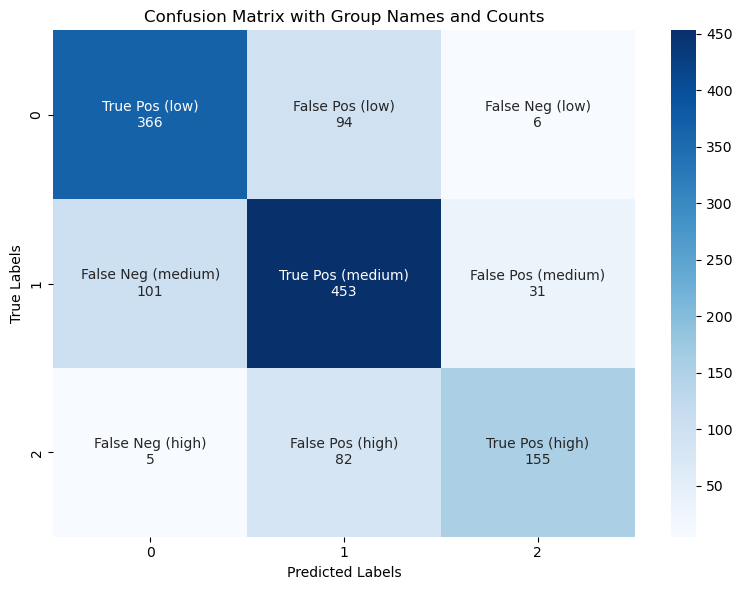

In [76]:
from sklearn.metrics import confusion_matrix
import numpy as np
cf_matrix = confusion_matrix(y_test, preds)

group_names = [
    'True Pos (low)', 'False Pos (low)', 'False Neg (low)',  # Row for true low class
    'False Neg (medium)', 'True Pos (medium)', 'False Pos (medium)',  # Row for true medium class
    'False Neg (high)', 'False Pos (high)', 'True Pos (high)'  # Row for true high class
]

# Generate count labels
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

# Create the labels without percentages
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]

# Reshape labels to match the confusion matrix shape
labels = np.asarray(labels).reshape(3, 3)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with Group Names and Counts")
plt.tight_layout()
plt.show()